In [ ]:
#| default_exp vision.data

In [ ]:
#| export
from __future__ import annotations

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
from fastai.vision.all import *
from fastgs.vision.core import *

# Vision data

> Data support functions for working with `TensorImageMS`

## Show methods -

In [ ]:
#| export
def _get_sample_ctxs(nimgs: int, nsamples: int, mskovl: bool, figsize=None):
    nrows = nsamples
    ncols = nimgs if mskovl else nimgs + 1

    ctxs = get_grid(nrows * ncols, nrows, ncols, figsize=figsize)
    return [ctxs[pos : pos + ncols] for pos in range(0, len(ctxs), ncols)]

In [ ]:
#| export
def _show_one_sample(img: TensorImageMS, msk: TensorMask, row, mskovl: bool, **kwargs):
    if mskovl:
        return [msk.show(ctx=c,**kwargs) for c in img.show(ctxs=row,**kwargs)]
    else:
        nimgs: int = img.num_images()
        return img.show(ctxs=row[:nimgs],**kwargs) + [msk.show(ctx=row[nimgs],**kwargs)]

Let's see this in action for 1 sample

In [ ]:
from fastgs.test.fixture import *

Load sample image and mask from test fixture

In [ ]:
(elvn_imgs,elvn_mask) = get_11b_test_tuple()

In [ ]:
def _show_one(mskovl):
    rowcx = _get_sample_ctxs(elvn_imgs.num_images(), 1, mskovl)
    _show_one_sample(elvn_imgs, elvn_mask, rowcx[0], mskovl)

First we see one MSData image with overlaid mask

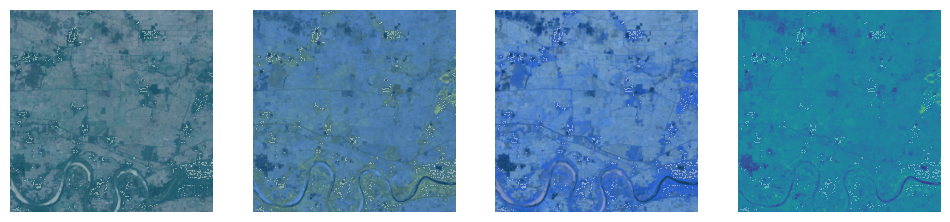

In [ ]:
_show_one(True)

Next we see the same image with the mask as a separate column

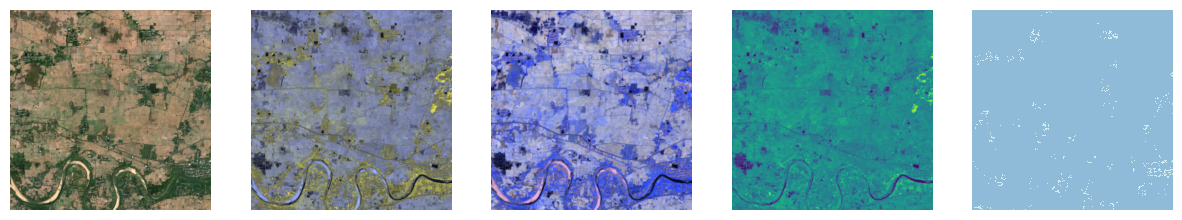

In [ ]:
_show_one(False)

In [ ]:
#| export
@typedispatch
def show_batch(
    x: TensorImageMS,  # Input(s) in the batch
    y: TensorMask,  # Target(s) in the batch
    samples: list,  # List of (`x`, `y`) pairs of length `max_n`
    ctxs=None,  # List of `ctx` objects to show data. Could be a matplotlib axis, DataFrame, etc.
    max_n: int=9,  # Maximum number of `samples` to show
    nrows: int=None,
    ncols: int=None,
    figsize=None,
    mskovl: bool=True, # mask is overlaid on the image
    **kwargs
):
    assert len(samples[0]) == 2 and not hasattr(samples[0], "show")
    assert nrows is None and ncols is None and ctxs is None

    rwcx = _get_sample_ctxs(x.num_images(), min(len(samples),max_n), mskovl, figsize)
    imgs,msks = samples.itemgot(0),samples.itemgot(1)
    return [_show_one_sample(img, msk, row, mskovl,**kwargs) for img, msk, row in zip(imgs, msks, rwcx)]

In [ ]:
from fastgs.test.fixture import *

In [ ]:
dl = get_11b_test_dl()

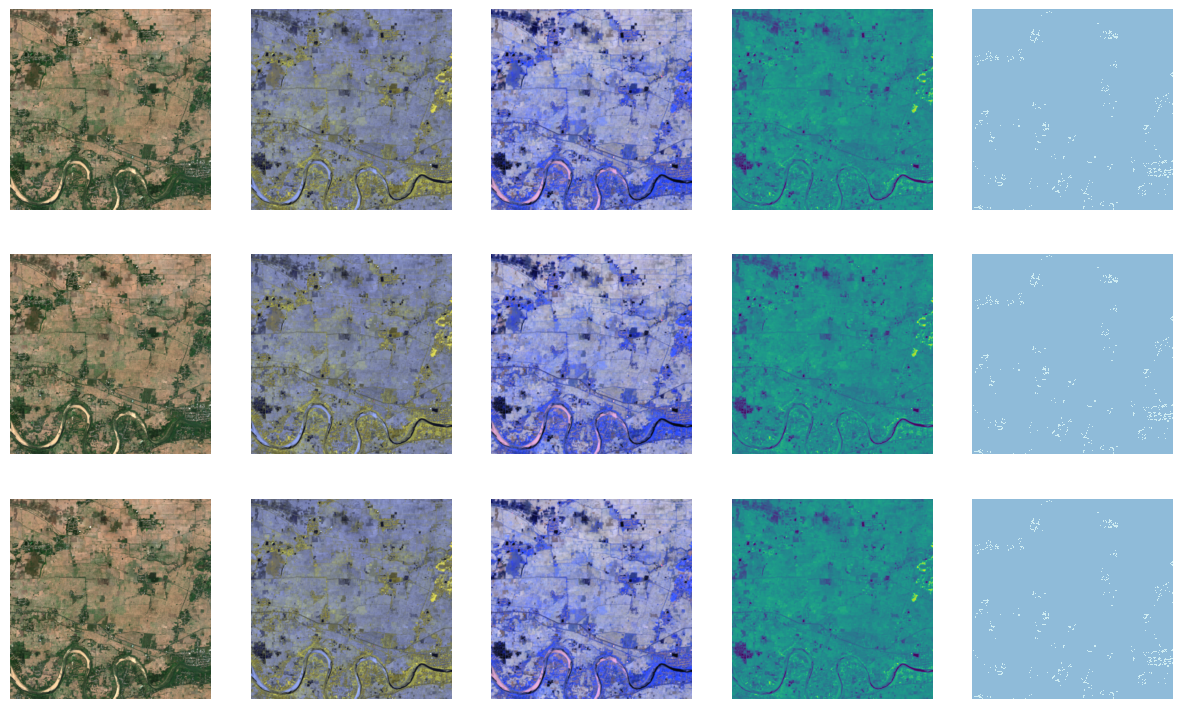

In [ ]:
b = dl.show_batch(max_n=3,mskovl=False)

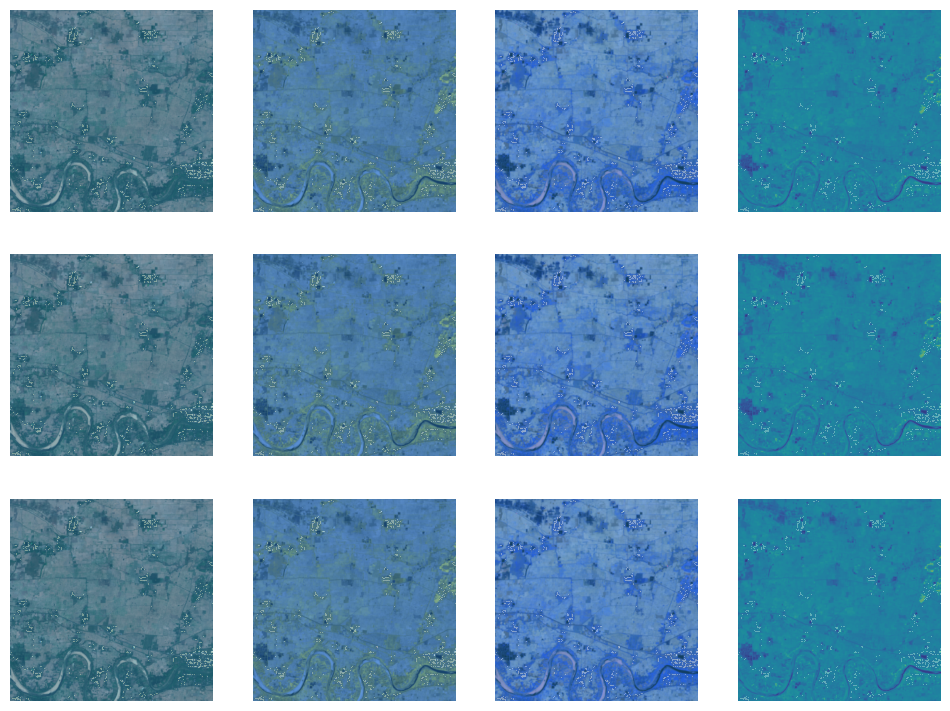

In [ ]:
b = dl.show_batch(max_n=3)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()